In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-19 00:00:00-04:00,6647.109863,6671.819824,6630.310059,6664.359863,9125960000,0.0,0.0
2025-09-22 00:00:00-04:00,6654.279785,6698.879883,6648.069824,6693.750000,5642620000,0.0,0.0
2025-09-23 00:00:00-04:00,6692.439941,6699.520020,6645.580078,6656.919922,5633620000,0.0,0.0


<Axes: xlabel='Date'>

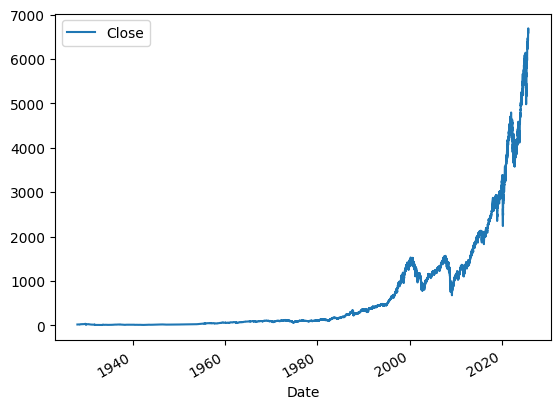

In [4]:
#plot graph of trading days vs closing price
sp500.plot.line(y="Close", use_index=True)

In [5]:
#delete columns that are more important for individual stocks rather than indices
del sp500["Dividends"]
del sp500["Stock Splits"]

In [6]:
#create a tomorrow column that is the value of the next days close column
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [7]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-09-19 00:00:00-04:00,6647.109863,6671.819824,6630.310059,6664.359863,9125960000,6693.750000
2025-09-22 00:00:00-04:00,6654.279785,6698.879883,6648.069824,6693.750000,5642620000,6656.919922
2025-09-23 00:00:00-04:00,6692.439941,6699.520020,6645.580078,6656.919922,5633620000,6637.970215


In [8]:
#set up target 
#returns an int indicating wether tomorrows price is greater than todays closing price
# 1 -> greater, 0 -> lower
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-09-19 00:00:00-04:00,6647.109863,6671.819824,6630.310059,6664.359863,9125960000,6693.750000,1
2025-09-22 00:00:00-04:00,6654.279785,6698.879883,6648.069824,6693.750000,5642620000,6656.919922,0
2025-09-23 00:00:00-04:00,6692.439941,6699.520020,6645.580078,6656.919922,5633620000,6637.970215,0


In [10]:
#remove data that came before 1990 
#market could've shifted fundamentally so old data may not be as useful for future preds
#use .copy() to avoid copy warning when trying to
#subset a pandas data frame and later assign back to it
sp500 = sp500.loc["1990-01-01":].copy()

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#split data into train and test set
#train -> all rows except last 100
#test -> last 100 rows

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
#measure models accuracy
from sklearn.metrics import precision_score

In [14]:
preds = model.predict(test[predictors])

In [15]:
#.predict method returns a num pi array 
# series easier to work with
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [16]:
#calculating precision score using actual target and predicted
precision_score(test["Target"], preds)

0.5882352941176471

In [17]:
#plotting predictions by combining actual vals with predicted
#set axis to 1 to treat each input as a column in our data set
combined = pd.concat([test["Target"], preds], axis=1)


<Axes: xlabel='Date'>

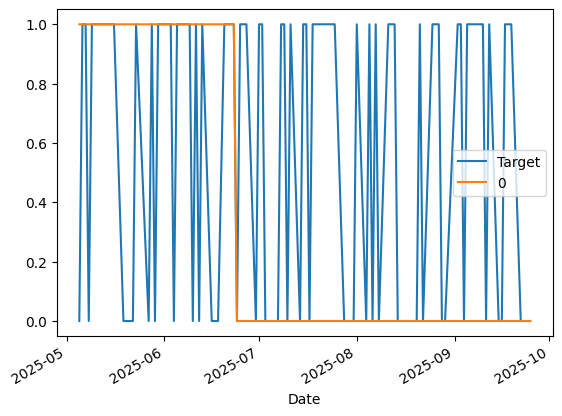

In [18]:
#orange line -> predictions
#blue line -> what actually happened
combined.plot()

In [19]:
#creating a prediction function
def predict(train, test, predictors, model):
	#fit model
	model.fit(train[predictors], train["Target"])
	#generate predictions
	preds = model.predict(test[predictors])
	#combine model into a series giving series a name
	preds = pd.Series(preds, index=test.index, name="Predictions")
	#combine everything together
	combined = pd.concat([test["Target"], preds], axis=1)
	return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
	#list of data frames where each data frame is the predictions for a single year
	all_predictions = []
	#loop across our data year by year, making predictions for all years
	#except the first 10 or so
	for i in range(start, data.shape[0], step):
		#split up training and test data
		train = data.iloc[0:i].copy()
		test = data.iloc[i:(i+step)].copy()
		predictions = predict(train, test, predictors, model)
		all_predictions.append(predictions)
		
		#concat takes the list of data frames and combines them into a single data frame
	return pd.concat(all_predictions)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
#start evaluating predictions
#counting how many times each type of prediction was made
predictions["Predictions"].value_counts()

Predictions
0    3834
1    2666
Name: count, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5300075018754689

In [24]:
#gives us percentages of days where market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536615
0    0.463385
Name: count, dtype: float64

In [25]:
#creating rolling averages for last 
#2 days, 5 days, 3 months, year, 4 years
#goal -> find ratio between today's closing price and avg closing price
#tells us if market's gone up a ton or down a ton
#useful to predict a crash or boost
horizons = [2, 5, 60, 250, 1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    #num days in past x days that stock price actually went up
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [26]:
#get rid of Nans
sp500 = sp500.dropna()

In [27]:
#improving the model by using probability 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    #in above line, model returns 0 or 1
    #we want more control over how we define what becomes a 1 and what becomes a 0
    #predict proba method returns a probability that the row will be a 0 or a 1
    preds = model.predict_proba(test[predictors])[:,1]
    #also want to set our custom threshold (default is 0.5)
    preds[preds >= .6] = 1
    preds[preds < .6] = 0 
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [28]:
predictions = backtest(sp500, model, new_predictors)

In [29]:
predictions["Predictions"].value_counts()

Predictions
0.0    4780
1.0     719
Name: count, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5660639777468707

In [31]:
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2025-09-18 00:00:00-04:00,6626.850098,6656.799805,6611.890137,6631.959961,5292400000,6664.359863,1,1.002389,1.0,1.003667,2.0,1.039668,34.0,1.111933,141.0,1.367068,530.0
2025-09-19 00:00:00-04:00,6647.109863,6671.819824,6630.310059,6664.359863,9125960000,6693.750000,1,1.002437,2.0,1.006132,3.0,1.043187,35.0,1.116654,141.0,1.373121,530.0
2025-09-22 00:00:00-04:00,6654.279785,6698.879883,6648.069824,6693.750000,5642620000,6656.919922,0,1.002200,2.0,1.008181,3.0,1.046279,35.0,1.120833,142.0,1.378538,531.0
2025-09-23 00:00:00-04:00,6692.439941,6699.520020,6645.580078,6656.919922,5633620000,6637.970215,0,0.997241,1.0,1.001121,3.0,1.039212,34.0,1.113966,141.0,1.370303,531.0
2025-09-24 00:00:00-04:00,6669.790039,6672.660156,6621.759766,6637.970215,5459180000,6604.720215,0,0.998575,0.0,0.997143,3.0,1.035088,33.0,1.110123,140.0,1.365761,530.0
